In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm
import folium 
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder
import ast

In [2]:
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [3]:
orders_df = pd.read_csv('orders.csv')
vendors_df = pd.read_csv('vendors.csv')
customerTrain_df = pd.read_csv('train_customers.csv')
customerTest_df = pd.read_csv('test_customers.csv')
locationTrain_df = pd.read_csv('train_locations.csv')
locationTest_df = pd.read_csv('test_locations.csv')

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_16573/1875438649.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('orders.csv')


In [4]:
orders_df.replace([np.inf, -np.inf], np.nan, inplace=True)
vendors_df.replace([np.inf, -np.inf], np.nan, inplace=True)
customerTrain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
customerTest_df.replace([np.inf, -np.inf], np.nan, inplace=True)
locationTrain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
locationTest_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [15]:
locationTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16720 non-null  object 
 1   location_number  16720 non-null  int64  
 2   location_type    9070 non-null   object 
 3   latitude         16717 non-null  float64
 4   longitude        16717 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 653.2+ KB


In [5]:
# locationTest_df
locationTest_df['longitude'] = locationTest_df['longitude'].astype('float16')
locationTest_df['latitude'] = locationTest_df['latitude'].astype('float16')
locationTest_df['location_number'] = locationTest_df['location_number'].astype('int8')

# locationTrain_df
locationTrain_df['longitude'] = locationTrain_df['longitude'].astype('float16')
locationTrain_df['latitude'] = locationTrain_df['latitude'].astype('float16')
locationTrain_df['location_number'] = locationTrain_df['location_number'].astype('int8')

# customerTrain_df
customerTrain_df['dob'] = customerTrain_df['dob'].astype('float16')
customerTrain_df['status'] = customerTrain_df['status'].astype('int8')
customerTrain_df['verified'] = customerTrain_df['verified'].astype('int8')

# customerTest_df
customerTest_df['dob'] = customerTest_df['dob'].astype('float16')
customerTest_df['status'] = customerTest_df['status'].astype('int8')
customerTest_df['verified'] = customerTest_df['verified'].astype('int8')

# orders_df
orders_df['akeed_order_id'] = orders_df['akeed_order_id'].astype('float16')
orders_df['item_count'] = orders_df['item_count'].astype('float16')
orders_df['grand_total'] = orders_df['grand_total'].astype('float16')

orders_df['vendor_discount_amount'] = orders_df['vendor_discount_amount'].astype('float16')
orders_df['promo_code_discount_percentage'] = orders_df['promo_code_discount_percentage'].astype('float16')
orders_df['vendor_rating'] = orders_df['vendor_rating'].astype('float16')


orders_df['driver_rating'] = orders_df['driver_rating'].astype('float16')
orders_df['deliverydistance'] = orders_df['deliverydistance'].astype('float16')
orders_df['preparationtime'] = orders_df['preparationtime'].astype('float16')


orders_df['payment_mode'] = orders_df['payment_mode'].astype('int8')
orders_df['vendor_id'] = orders_df['vendor_id'].astype('int8')
orders_df['LOCATION_NUMBER'] = orders_df['LOCATION_NUMBER'].astype('int8')

# vendors_df
vendors_df['authentication_id'] = vendors_df['authentication_id'].astype('float16')
vendors_df['latitude'] = vendors_df['latitude'].astype('float16')
vendors_df['longitude'] = vendors_df['longitude'].astype('float16')
vendors_df['vendor_category_id'] = vendors_df['vendor_category_id'].astype('float16')
vendors_df['delivery_charge'] = vendors_df['delivery_charge'].astype('float16')
vendors_df['serving_distance'] = vendors_df['serving_distance'].astype('float16')
vendors_df['is_open'] = vendors_df['is_open'].astype('float16')
vendors_df['commission'] = vendors_df['commission'].astype('float16')
vendors_df['discount_percentage'] = vendors_df['discount_percentage'].astype('float16')
vendors_df['status'] = vendors_df['status'].astype('float16')
vendors_df['vendor_rating'] = vendors_df['vendor_rating'].astype('float16')
vendors_df['open_close_flags'] = vendors_df['open_close_flags'].astype('float16')
vendors_df['country_id'] = vendors_df['country_id'].astype('float16')
vendors_df['city_id'] = vendors_df['city_id'].astype('float16')


vendors_df['id'] = vendors_df['id'].astype('int8')
vendors_df['prepration_time'] = vendors_df['prepration_time'].astype('int8')
vendors_df['verified'] = vendors_df['verified'].astype('int8')
vendors_df['rank'] = vendors_df['rank'].astype('int8')
vendors_df['device_type'] = vendors_df['device_type'].astype('int8')
vendors_df['display_orders'] = vendors_df['display_orders'].astype('int8')


/Users/damacm172_/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/damacm172_/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [19]:
vendors_df.to_csv('vendors_df.csv', index=False)
orders_df.to_csv('orders_df.csv', index=False)
customerTest_df.to_csv('customer_Test_df.csv', index=False)
customerTrain_df.to_csv('customer_Train_df.csv', index=False)
locationTest_df.to_csv('location_Test_df.csv', index=False)
locationTrain_df.to_csv('location_Train_df.csv', index=False)

In [20]:
orders_df = pd.read_csv('orders_df.csv')
vendors_df = pd.read_csv('vendors_df.csv')
customerTrain_df = pd.read_csv('customer_Train_df.csv')
customerTest_df = pd.read_csv('customer_Test_df.csv')
locationTrain_df = pd.read_csv('location_Train_df.csv')
locationTest_df = pd.read_csv('location_Test_df.csv')

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_16211/37841638.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('orders_df.csv')


In [6]:
vendors_df.dtypes    

id                         int8
authentication_id       float16
latitude                float16
longitude               float16
vendor_category_en       object
vendor_category_id      float16
delivery_charge         float16
serving_distance        float16
is_open                 float16
OpeningTime              object
OpeningTime2             object
prepration_time            int8
commission              float16
is_akeed_delivering      object
discount_percentage     float16
status                  float16
verified                   int8
rank                       int8
language                 object
vendor_rating           float16
sunday_from_time1        object
sunday_to_time1          object
sunday_from_time2        object
sunday_to_time2          object
monday_from_time1        object
monday_to_time1          object
monday_from_time2        object
monday_to_time2          object
tuesday_from_time1       object
tuesday_to_time1         object
tuesday_from_time2       object
tuesday_

In [7]:
# orders_df['LOCATION_NUMBER'] = orders_df['LOCATION_NUMBER'].astype('int8')

In [7]:
vendors_df['vendor_id'] = vendors_df['id']
vendors_df.drop(['id'], axis = 1)

,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,...,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders,vendor_id
0,inf,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,-,...,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,4
1,inf,-0.471680,0.744629,Restaurants,2.0,0.700195,5.0,1.0,08:30AM-10:30PM,-,...,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,13
2,inf,-0.407471,0.643555,Restaurants,2.0,0.000000,8.0,1.0,08:00AM-10:45PM,-,...,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,20
3,inf,-0.585449,0.753906,Restaurants,2.0,0.000000,5.0,1.0,10:59AM-10:30PM,-,...,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,23
4,inf,0.480713,0.552734,Restaurants,2.0,0.700195,15.0,1.0,11:00AM-11:45PM,-,...,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,inf,-1.587891,-0.066467,Restaurants,2.0,0.000000,10.0,1.0,NaN,NaN,...,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1,81
96,inf,2.144531,0.745117,Restaurants,2.0,0.000000,8.0,1.0,NaN,NaN,...,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",Y,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1,87
97,inf,0.251465,0.483643,Restaurants,2.0,0.000000,7.0,1.0,NaN,NaN,...,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1,88
98,inf,0.019821,0.586914,Restaurants,2.0,0.000000,3.0,1.0,NaN,NaN,...,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1,90


In [8]:
customerTrain_df['customer_id'] = customerTrain_df['akeed_customer_id']
customerTrain_df.drop(['akeed_customer_id'],axis=1)

,gender,dob,status,verified,language,created_at,updated_at,customer_id
0,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT
1,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41,ZGFSYCZ
2,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42,S2ALZFL
3,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07,952DBJQ
4,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01,1IX6FXS
...,...,...,...,...,...,...,...,...
34669,NaN,NaN,1,1,NaN,2020-03-03 13:01:13,2020-03-03 13:02:21,JAI79PE
34670,NaN,NaN,1,1,NaN,2020-03-03 13:22:35,2020-03-03 13:22:41,TR75VFL
34671,NaN,NaN,1,1,NaN,2020-03-03 13:24:27,2020-03-03 13:24:44,SQMJ08H
34672,NaN,NaN,1,1,NaN,2020-03-03 13:24:28,2020-03-03 13:28:00,9LW9CHN


In [9]:
customerTest_df['customer_id'] = customerTest_df['akeed_customer_id']
customerTest_df.drop(['akeed_customer_id'],axis=1)

,gender,dob,status,verified,language,created_at,updated_at,customer_id
0,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP
1,Male,NaN,1,1,EN,2018-03-22 20:11:47,2018-03-22 20:11:47,FWNUI71
2,Male,NaN,1,1,EN,2018-04-17 20:01:15,2018-04-17 20:01:15,LRX7BCH
3,Male,NaN,1,1,EN,2018-04-29 22:35:52,2018-04-29 22:35:52,D96DHMD
4,Male,1997.0,1,1,EN,2018-05-05 12:38:09,2018-05-05 12:38:09,88Q8Y5V
...,...,...,...,...,...,...,...,...
9763,NaN,NaN,1,1,NaN,2020-03-03 12:03:03,2020-03-03 12:03:16,369I4YD
9764,NaN,NaN,1,1,NaN,2020-03-03 12:17:09,2020-03-03 14:04:41,VUOXW5K
9765,NaN,NaN,1,1,NaN,2020-03-03 12:23:20,2020-03-03 12:24:20,H1S2T2Y
9766,NaN,NaN,1,1,NaN,2020-03-03 13:18:23,2020-03-03 13:18:39,QGPCD5S


In [10]:
orders_df['location_type'] = orders_df['LOCATION_TYPE']
orders_df.drop(['LOCATION_TYPE'], axis=1)

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,CID X LOC_NUM X VENDOR,location_type
0,inf,92PEE24,1.0,7.601562,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,92PEE24 X 0 X 105,NaN
1,inf,QS68UD8,1.0,8.703125,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,38,2019-08-01 05:31:10,0,QS68UD8 X 0 X 294,Work
2,inf,MB7VY5F,2.0,14.398438,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,MB7VY5F X 0 X 83,NaN
3,inf,KDJ951Y,1.0,7.101562,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,KDJ951Y X 0 X 90,Home
4,inf,BAL0RVT,4.0,27.203125,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,BAL0RVT X 0 X 83,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,inf,L6LFY6H,1.0,13.296875,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,L6LFY6H X 0 X 67,NaN
135299,inf,2GMMVGI,3.0,9.500000,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,2GMMVGI X 0 X 79,Work
135300,inf,LYTAAV0,4.0,18.203125,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,LYTAAV0 X 2 X 28,Other
135301,inf,NEV9A5D,3.0,7.699219,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,73,2020-02-29 23:50:10,0,NEV9A5D X 0 X 841,NaN


In [11]:
orders_df['location_number'] = orders_df['LOCATION_NUMBER']
orders_df.drop(['LOCATION_NUMBER'], axis=1)

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_TYPE,CID X LOC_NUM X VENDOR,location_type,location_number
0,inf,92PEE24,1.0,7.601562,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,NaN,92PEE24 X 0 X 105,NaN,0
1,inf,QS68UD8,1.0,8.703125,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,2019-07-31 05:30:00,38,2019-08-01 05:31:10,Work,QS68UD8 X 0 X 294,Work,0
2,inf,MB7VY5F,2.0,14.398438,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,NaN,MB7VY5F X 0 X 83,NaN,0
3,inf,KDJ951Y,1.0,7.101562,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,Home,KDJ951Y X 0 X 90,Home,0
4,inf,BAL0RVT,4.0,27.203125,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,Work,BAL0RVT X 0 X 83,Work,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,inf,L6LFY6H,1.0,13.296875,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,NaN,L6LFY6H X 0 X 67,NaN,0
135299,inf,2GMMVGI,3.0,9.500000,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,Work,2GMMVGI X 0 X 79,Work,0
135300,inf,LYTAAV0,4.0,18.203125,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,Other,LYTAAV0 X 2 X 28,Other,2
135301,inf,NEV9A5D,3.0,7.699219,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,73,2020-02-29 23:50:10,NaN,NEV9A5D X 0 X 841,NaN,0


In [12]:
conc_locations = pd.concat([locationTrain_df, locationTest_df], axis=0)
conc_locations

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682617,-78.812500
1,02SFNJH,1,NaN,1.678711,0.766602
2,02SFNJH,2,NaN,-0.498535,0.661133
3,RU43CXC,0,Home,0.100830,0.438232
4,BDFBPRD,0,NaN,2.523438,0.733398
...,...,...,...,...,...
16715,L9G4OFV,4,NaN,-0.197754,0.609375
16716,L9G4OFV,5,NaN,-0.343018,0.625977
16717,FDZFYBA,0,Home,-0.975098,-0.177856
16718,UTKHR1C,0,Other,1.058594,0.001628


In [13]:
conc_customers = pd.concat([customerTrain_df, customerTest_df], axis=0)
conc_customers

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at,customer_id
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41,ZGFSYCZ
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42,S2ALZFL
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07,952DBJQ
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01,1IX6FXS
...,...,...,...,...,...,...,...,...,...
9763,369I4YD,NaN,NaN,1,1,NaN,2020-03-03 12:03:03,2020-03-03 12:03:16,369I4YD
9764,VUOXW5K,NaN,NaN,1,1,NaN,2020-03-03 12:17:09,2020-03-03 14:04:41,VUOXW5K
9765,H1S2T2Y,NaN,NaN,1,1,NaN,2020-03-03 12:23:20,2020-03-03 12:24:20,H1S2T2Y
9766,QGPCD5S,NaN,NaN,1,1,NaN,2020-03-03 13:18:23,2020-03-03 13:18:39,QGPCD5S


In [46]:
ven_order = pd.merge(vendors_df, orders_df, on=['vendor_id'])
ven_order_loc = pd.merge(ven_order, locationTrain_df, on=['customer_id'])
ven_order_loc_cust = pd.merge(ven_order_loc, customerTrain_df, on=['customer_id'])
ven_order_loc_cust


,id,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,latitude_y,longitude_y,akeed_customer_id,gender,dob,status_y,verified_y,language_y,created_at,updated_at_y
0,4,inf,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,-0.603516,-78.500000,TBOTOCJ,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
1,4,inf,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,-0.604004,0.752930,TBOTOCJ,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
2,4,inf,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,-0.603516,-78.500000,TBOTOCJ,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
3,4,inf,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,-0.604004,0.752930,TBOTOCJ,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
4,-68,inf,-0.405762,0.644531,Restaurants,2.0,0.700195,8.0,1.0,11:59AM-10:45PM,...,-0.603516,-78.500000,TBOTOCJ,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458398,-117,inf,13.335938,-1.449219,Restaurants,2.0,0.700195,12.0,1.0,NaN,...,12.453125,-1.444336,6PY2OK5,NaN,NaN,1,1,NaN,2020-02-05 22:20:58,2020-02-05 22:21:40
458399,-117,inf,13.335938,-1.449219,Restaurants,2.0,0.700195,12.0,1.0,NaN,...,14.523438,-1.406250,UPNI9BV,NaN,NaN,1,1,NaN,2020-03-02 20:12:13,2020-03-02 20:12:38
458400,-117,inf,13.335938,-1.449219,Restaurants,2.0,0.700195,12.0,1.0,NaN,...,13.312500,-1.383789,U6PTUT5,NaN,NaN,1,1,NaN,2020-02-04 20:42:16,2020-02-04 20:44:30
458401,-117,inf,13.335938,-1.449219,Restaurants,2.0,0.700195,12.0,1.0,NaN,...,13.351562,-1.386719,MSEGQHZ,NaN,NaN,1,1,NaN,2020-03-03 04:23:00,2020-03-03 04:23:26


In [22]:
missing_perc = ven_order_loc_cust.isna().sum()/ven_order_loc_cust.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

id                                 0.000000
authentication_id                  0.000000
latitude_x                         0.000000
longitude_x                        0.000000
vendor_category_en                 0.000000
vendor_category_id                 0.000000
delivery_charge                    0.000000
serving_distance                   0.000000
is_open                            0.000000
OpeningTime                        9.391300
OpeningTime2                       9.391300
prepration_time                    0.000000
commission                        13.705190
is_akeed_delivering                0.000000
discount_percentage                0.000000
status_x                           0.000000
verified_x                         0.000000
rank                               0.000000
language_x                        13.705190
vendor_rating_x                    0.000000
sunday_from_time1                  0.482763
sunday_to_time1                    0.482763
sunday_from_time2               

In [47]:
columns_to_drop = ['sunday_to_time2','sunday_from_time2','monday_to_time2','monday_from_time2','tuesday_to_time2','tuesday_from_time2','wednesday_to_time2',
                   'wednesday_from_time2','thursday_to_time2','thursday_from_time2','friday_from_time2','friday_to_time2','saturday_from_time2','saturday_to_time2',
                   'promo_code','promo_code_discount_percentage','vendor_rating_y','driver_accepted_time','delivery_time','delivery_date','dob']


In [48]:
ven_order_loc_cust.drop(columns_to_drop, axis=1, inplace=True)

In [49]:
columns_to_drop_= ['location_type_x', 'location_number_x', 'location_number_y', 'location_type_y']

In [50]:
ven_order_loc_cust.drop(columns_to_drop_, axis=1, inplace=True)

In [51]:
ven_order_loc_cust.columns

Index(['id', 'authentication_id', 'latitude_x', 'longitude_x',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_x', 'verified_x', 'rank', 'language_x',
       'vendor_rating_x', 'sunday_from_time1', 'sunday_to_time1',
       'monday_from_time1', 'monday_to_time1', 'tuesday_from_time1',
       'tuesday_to_time1', 'wednesday_from_time1', 'wednesday_to_time1',
       'thursday_from_time1', 'thursday_to_time1', 'friday_from_time1',
       'friday_to_time1', 'saturday_from_time1', 'saturday_to_time1',
       'primary_tags', 'open_close_flags', 'vendor_tag', 'vendor_tag_name',
       'one_click_vendor', 'country_id', 'city_id', 'created_at_x',
       'updated_at_x', 'device_type', 'display_orders', 'vendor_id',
       'akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'v

In [28]:
missing_perc = ven_order_loc_cust.isna().sum()/ven_order_loc_cust.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

id                         0.000000
authentication_id          0.000000
latitude_x                 0.000000
longitude_x                0.000000
vendor_category_en         0.000000
vendor_category_id         0.000000
delivery_charge            0.000000
serving_distance           0.000000
is_open                    0.000000
OpeningTime                9.391300
OpeningTime2               9.391300
prepration_time            0.000000
commission                13.705190
is_akeed_delivering        0.000000
discount_percentage        0.000000
status_x                   0.000000
verified_x                 0.000000
rank                       0.000000
language_x                13.705190
vendor_rating_x            0.000000
sunday_from_time1          0.482763
sunday_to_time1            0.482763
monday_from_time1          0.000000
monday_to_time1            0.000000
tuesday_from_time1         0.482763
tuesday_to_time1           0.482763
wednesday_from_time1       0.000000
wednesday_to_time1         0

In [52]:
columns_to_ffill = ['OpeningTime', 'OpeningTime2', 'commission', 'language_x', 'sunday_from_time1', 'sunday_to_time1', 'tuesday_from_time1', 'tuesday_to_time1',  'thursday_from_time1', 'thursday_to_time1',
                    'friday_from_time1', 'friday_to_time1','saturday_from_time1','saturday_to_time1', 'vendor_tag', 'vendor_tag_name', 'akeed_order_id', 'item_count', 'latitude_y', 'longitude_y', 'language_y']

In [53]:
ven_order_loc_cust[columns_to_ffill] = ven_order_loc_cust[columns_to_ffill].interpolate()


In [31]:
missing_perc = ven_order_loc_cust.isna().sum()/ven_order_loc_cust.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

id                         0.000000
authentication_id          0.000000
latitude_x                 0.000000
longitude_x                0.000000
vendor_category_en         0.000000
vendor_category_id         0.000000
delivery_charge            0.000000
serving_distance           0.000000
is_open                    0.000000
OpeningTime                9.391300
OpeningTime2               9.391300
prepration_time            0.000000
commission                 0.000000
is_akeed_delivering        0.000000
discount_percentage        0.000000
status_x                   0.000000
verified_x                 0.000000
rank                       0.000000
language_x                13.705190
vendor_rating_x            0.000000
sunday_from_time1          0.482763
sunday_to_time1            0.482763
monday_from_time1          0.000000
monday_to_time1            0.000000
tuesday_from_time1         0.482763
tuesday_to_time1           0.482763
wednesday_from_time1       0.000000
wednesday_to_time1         0

In [54]:
columns_to_bfill = ['primary_tags', 'is_favorite', 'preparationtime', 'order_accepted_time', 'ready_for_pickup_time', 
                    'picked_up_time', 'delivered_time', 'LOCATION_TYPE', 'gender' ]

In [55]:
ven_order_loc_cust[columns_to_bfill] = ven_order_loc_cust[columns_to_bfill].interpolate()


In [34]:
missing_perc = ven_order_loc_cust.isna().sum()/ven_order_loc_cust.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

id                         0.000000
authentication_id          0.000000
latitude_x                 0.000000
longitude_x                0.000000
vendor_category_en         0.000000
vendor_category_id         0.000000
delivery_charge            0.000000
serving_distance           0.000000
is_open                    0.000000
OpeningTime                9.391300
OpeningTime2               9.391300
prepration_time            0.000000
commission                 0.000000
is_akeed_delivering        0.000000
discount_percentage        0.000000
status_x                   0.000000
verified_x                 0.000000
rank                       0.000000
language_x                13.705190
vendor_rating_x            0.000000
sunday_from_time1          0.482763
sunday_to_time1            0.482763
monday_from_time1          0.000000
monday_to_time1            0.000000
tuesday_from_time1         0.482763
tuesday_to_time1           0.482763
wednesday_from_time1       0.000000
wednesday_to_time1         0

In [56]:
columns_to_backfil = ['language_y','LOCATION_TYPE','gender','delivered_time','picked_up_time','ready_for_pickup_time','order_accepted_time','preparationtime','is_favorite','vendor_tag_name','vendor_tag','primary_tags','saturday_to_time1',
                      'saturday_from_time1','friday_to_time1','friday_from_time1','thursday_to_time1','thursday_from_time1','tuesday_to_time1','tuesday_from_time1','sunday_to_time1','sunday_from_time1','language_x','OpeningTime2','OpeningTime']

In [57]:
ven_order_loc_cust[columns_to_backfil] = ven_order_loc_cust[columns_to_backfil].fillna(0)


In [ ]:
missing_perc = ven_order_loc_cust.isna().sum()/ven_order_loc_cust.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

In [ ]:
ven_order_loc_cust.info()

In [42]:
ven_order_loc_cust.duplicated().sum()

1

In [58]:
ven_order_loc_cust.drop_duplicates(inplace=True)


In [44]:
ven_order_loc_cust.duplicated().sum()


0

In [46]:
ven_order_loc_cust.shape

(458402, 74)

In [ ]:
ven_order_loc_cust.isna().sum

In [61]:
columns_to_dr = ['OpeningTime2','language_x', 'language_y']

In [62]:
ven_order_loc_cust.drop(columns_to_dr, axis=1, inplace=True)

In [63]:
ven_order_loc_cust.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
ds = ven_order_loc_cust.isin([np.inf, -np.inf])
print(ds)

In [65]:
ven_order_loc_cust['authentication_id'] = ven_order_loc_cust['authentication_id'].fillna(0)


In [ ]:
ven_order_loc_cust.isna().sum

In [33]:
ven_order_loc_cust.head(8)

,id,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,LOCATION_TYPE,CID X LOC_NUM X VENDOR,latitude_y,longitude_y,akeed_customer_id,gender,status_y,verified_y,created_at,updated_at_y
0,4,0.0,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,Home,TBOTOCJ X 0 X 4,-0.603516,-78.50000,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
1,4,0.0,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,Home,TBOTOCJ X 0 X 4,-0.604004,0.75293,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
2,4,0.0,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,Home,TBOTOCJ X 0 X 4,-0.603516,-78.50000,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
3,4,0.0,-0.588379,0.754395,Restaurants,2.0,0.000000,6.0,1.0,11:00AM-11:30PM,...,Home,TBOTOCJ X 0 X 4,-0.604004,0.75293,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
4,-68,0.0,-0.405762,0.644531,Restaurants,2.0,0.700195,8.0,1.0,11:59AM-10:45PM,...,Home,TBOTOCJ X 0 X 188,-0.603516,-78.50000,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
5,-68,0.0,-0.405762,0.644531,Restaurants,2.0,0.700195,8.0,1.0,11:59AM-10:45PM,...,Home,TBOTOCJ X 0 X 188,-0.604004,0.75293,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
6,-61,0.0,-0.704590,0.056946,Restaurants,2.0,0.700195,15.0,1.0,05:30PM-11:59PM,...,Home,TBOTOCJ X 0 X 195,-0.603516,-78.50000,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
7,-61,0.0,-0.704590,0.056946,Restaurants,2.0,0.700195,15.0,1.0,05:30PM-11:59PM,...,Home,TBOTOCJ X 0 X 195,-0.604004,0.75293,TBOTOCJ,0,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48


In [54]:
column_data_types = ven_order_loc_cust.dtypes

# Separate columns into categorical and numerical
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)




Categorical Columns:
['vendor_category_en', 'OpeningTime', 'is_akeed_delivering', 'sunday_from_time1', 'sunday_to_time1', 'monday_from_time1', 'monday_to_time1', 'tuesday_from_time1', 'tuesday_to_time1', 'wednesday_from_time1', 'wednesday_to_time1', 'thursday_from_time1', 'thursday_to_time1', 'friday_from_time1', 'friday_to_time1', 'saturday_from_time1', 'saturday_to_time1', 'primary_tags', 'vendor_tag', 'vendor_tag_name', 'one_click_vendor', 'created_at_x', 'updated_at_x', 'customer_id', 'is_favorite', 'is_rated', 'order_accepted_time', 'ready_for_pickup_time', 'picked_up_time', 'delivered_time', 'created_at_y', 'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR', 'akeed_customer_id', 'gender', 'created_at', 'updated_at_y']

Numerical Columns:
['id', 'authentication_id', 'latitude_x', 'longitude_x', 'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open', 'prepration_time', 'commission', 'discount_percentage', 'status_x', 'verified_x', 'rank', 'vendor_rating_x', 'open_close_flags

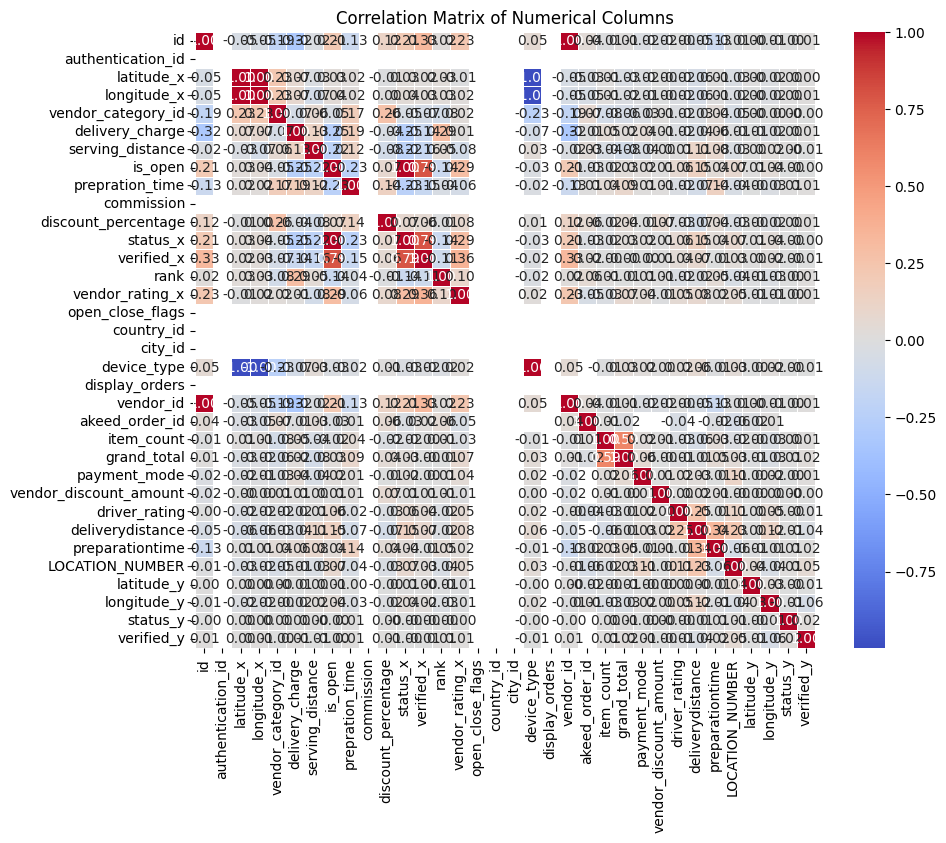

In [49]:
numerical_columns = ven_order_loc_cust.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [56]:
restrurant_df.columns

Index(['id', 'authentication_id', 'latitude_x', 'longitude_x',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'prepration_time',
       'commission', 'is_akeed_delivering', 'discount_percentage', 'status_x',
       'verified_x', 'rank', 'vendor_rating_x', 'sunday_from_time1',
       'sunday_to_time1', 'monday_from_time1', 'monday_to_time1',
       'tuesday_from_time1', 'tuesday_to_time1', 'wednesday_from_time1',
       'wednesday_to_time1', 'thursday_from_time1', 'thursday_to_time1',
       'friday_from_time1', 'friday_to_time1', 'saturday_from_time1',
       'saturday_to_time1', 'primary_tags', 'open_close_flags', 'vendor_tag',
       'vendor_tag_name', 'one_click_vendor', 'country_id', 'city_id',
       'created_at_x', 'updated_at_x', 'device_type', 'display_orders',
       'vendor_id', 'akeed_order_id', 'customer_id', 'item_count',
       'grand_total', 'payment_mode', 'vendor_discount_amount', 'is_favorite'

<h1> STATISTICS <h1>

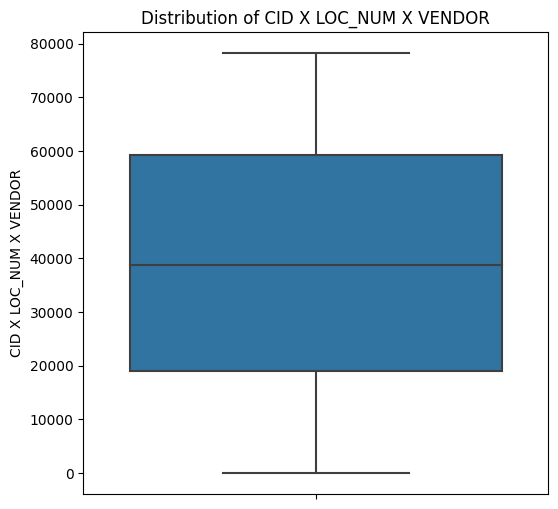

In [55]:
label_encoder = LabelEncoder()
ven_order_loc_cust['CID X LOC_NUM X VENDOR'] = label_encoder.fit_transform(ven_order_loc_cust['CID X LOC_NUM X VENDOR'])

# Now you can plot the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=ven_order_loc_cust['CID X LOC_NUM X VENDOR'])
plt.title("Distribution of CID X LOC_NUM X VENDOR")
plt.show()

In [ ]:
Q1 =ven_order_loc_cust['CID X LOC_NUM X VENDOR'].quantile(0.25)
Q3 = ven_order_loc_cust['CID X LOC_NUM X VENDOR'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Text(0, 0.5, 'CID X LOC_NUM X VENDOR')

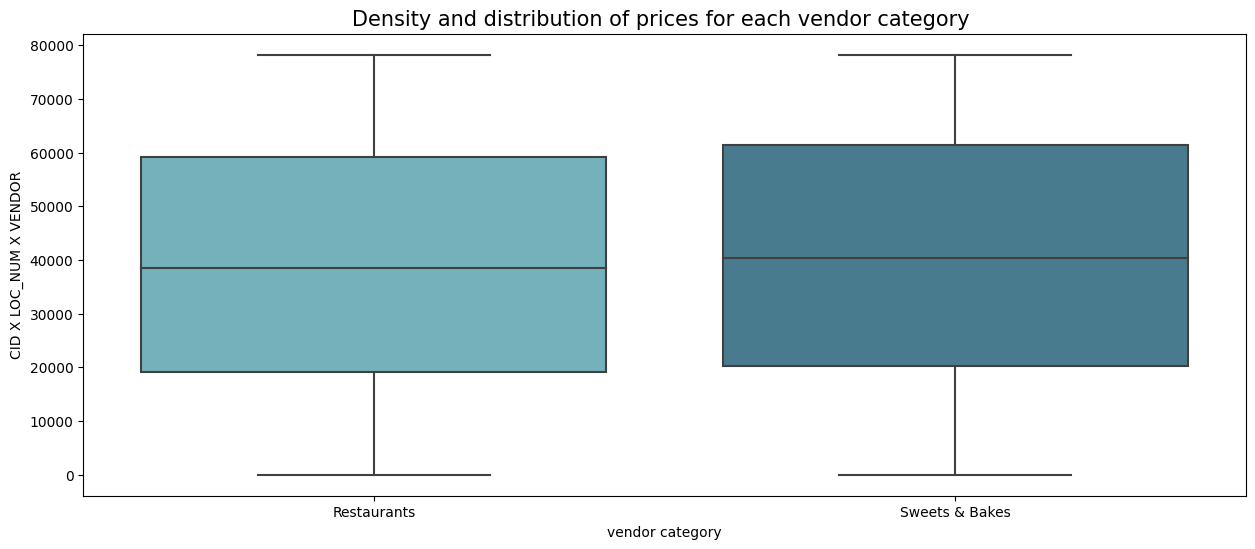

In [52]:
plt.figure(figsize=(15,6))
sns.boxplot(data=ven_order_loc_cust, x='vendor_category_en', y='CID X LOC_NUM X VENDOR', palette='GnBu_d')
plt.title('Density and distribution of prices for each vendor category ', fontsize=15)
plt.xlabel('vendor category')
plt.ylabel("CID X LOC_NUM X VENDOR")

In [ ]:
plt.figure(figsize=(6, 6))
sns.distplot(ven_order_loc_cust['CID X LOC_NUM X VENDOR'], kde=False)
plt.title('Distribution of CID X LOC_NUM X VENDOR')

In [ ]:
plt.figure(figsize=(6,6))
numbers = ven_order_loc_cust['vendor_category_en'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Percentage in Each vendor_category_en')

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(ven_order_loc_cust['LOCATION_TYPE'], bins=20)
plt.title("Distribution of LOCATION_TYPE")
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=restrurant_df['longitude_y'], y=restrurant_df['latitude_y'], hue=restrurant_df['vendor_category_en'], ax=axs[0])
axs[0].set_title('Vendor Category by Longitude and Latitude' )
axs[0].set_xlabel('longitude_y')
axs[0].set_ylabel('latitude_y')
sns.scatterplot(x=restrurant_df['longitude_y'], y=restrurant_df['latitude_y'], hue=restrurant_df['LOCATION_TYPE'], ax=axs[1])
axs[1].set_title('Location Type by Longitude and Latitude')
axs[1].set_xlabel('longitude_y')
axs[1].set_ylabel('latitude_y')
plt.tight_layout()
plt.show()

In [36]:
le = LabelEncoder()
le = LabelEncoder()
le.fit(ven_order_loc_cust["CID X LOC_NUM X VENDOR"])
ven_order_loc_cust["CID X LOC_NUM X VENDOR"] = le.transform(ven_order_loc_cust["CID X LOC_NUM X VENDOR"])
le = LabelEncoder()

In [58]:
print("Skewness:", ven_order_loc_cust['CID X LOC_NUM X VENDOR'].skew())
print("Kurtosis:", ven_order_loc_cust['CID X LOC_NUM X VENDOR'].kurt())

Skewness: 0.01089248173362655
Kurtosis: -1.2248163318106313


In [ ]:
latitudes = np.array(ven_order_loc_cust['latitude_y'])
longitudes = np.array(ven_order_loc_cust['longitude_y'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

<h1> FEATURE SELECTION <h1>

In [ ]:
# subset_df = restrurant_df[['id', 'authentication_id', 'latitude_x', 'longitude_x',
#        'vendor_category_en', 'vendor_category_id', 'delivery_charge',
#        'serving_distance', 'is_open', 'OpeningTime', 'prepration_time',
#        'commission', 'is_akeed_delivering', 'discount_percentage', 'status_x',
#        'verified_x', 'rank', 'vendor_rating_x', 'sunday_from_time1',
#        'sunday_to_time1', 'monday_from_time1', 'monday_to_time1',
#        'tuesday_from_time1', 'tuesday_to_time1', 'wednesday_from_time1',
#        'wednesday_to_time1', 'thursday_from_time1', 'thursday_to_time1',
#        'friday_from_time1', 'friday_to_time1', 'saturday_from_time1',
#        'saturday_to_time1', 'primary_tags', 'open_close_flags', 'vendor_tag',
#        'vendor_tag_name', 'one_click_vendor', 'country_id', 'city_id',
#        'created_at_x', 'updated_at_x', 'device_type', 'display_orders',
#        'vendor_id', 'akeed_order_id', 'customer_id', 'item_count',
#        'grand_total', 'payment_mode', 'vendor_discount_amount', 'is_favorite',
#        'is_rated', 'driver_rating', 'deliverydistance', 'preparationtime',
#        'order_accepted_time', 'ready_for_pickup_time', 'picked_up_time',
#        'delivered_time', 'created_at_y', 'LOCATION_NUMBER', 'LOCATION_TYPE',
#        'CID X LOC_NUM X VENDOR', 'latitude_y', 'longitude_y',
#        'akeed_customer_id', 'gender', 'status_y', 'verified_y', 'created_at',
#        'updated_at_y']]


# # Calculate the VIF for each variable
# vif = pd.DataFrame()
# vif["Variable"] = subset_df.columns
# vif["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

# # Print the VIF values
# print(vif)



In [ ]:
# # Replace inf values with a large finite value (e.g., 1e9) and fill NaN values with 0
# subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
# subset_df.fillna(0, inplace=True)

# # Create a list of numeric column names
# numeric_columns = subset_df.select_dtypes(include=[np.number]).columns.tolist()

# # Calculate the VIF for each numeric variable
# vif = pd.DataFrame()
# vif["Variable"] = numeric_columns
# vif["VIF"] = [variance_inflation_factor(subset_df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# # Print the VIF values
# print(vif)


In [59]:

# X =restrurant_df[numerical_columns] 
# v_threshold = VarianceThreshold(threshold=0.5)
# v_threshold.fit(X)
# selected_features = v_threshold.get_support()

# selected_features


# Check for missing values in DataFrame X


ven_order_loc_cust.dtypes




id                       int8
authentication_id     float16
latitude_x            float16
longitude_x           float16
vendor_category_en     object
                       ...   
gender                 object
status_y                 int8
verified_y               int8
created_at             object
updated_at_y           object
Length: 71, dtype: object

In [ ]:
Y = ven_order_loc_cust['CID X LOC_NUM X VENDOR']
X = pd.get_dummies(ven_order_loc_cust[['id', 'latitude_x', 'longitude_x',
                                  'serving_distance', 'prepration_time', 'discount_percentage', 
                                  'rank', 'vendor_id', 'akeed_order_id', 'item_count', 
                                  'grand_total', 'payment_mode', 'driver_rating', 
                                  'deliverydistance', 'preparationtime', 'LOCATION_NUMBER', 
                                  'latitude_y', 'longitude_y']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()

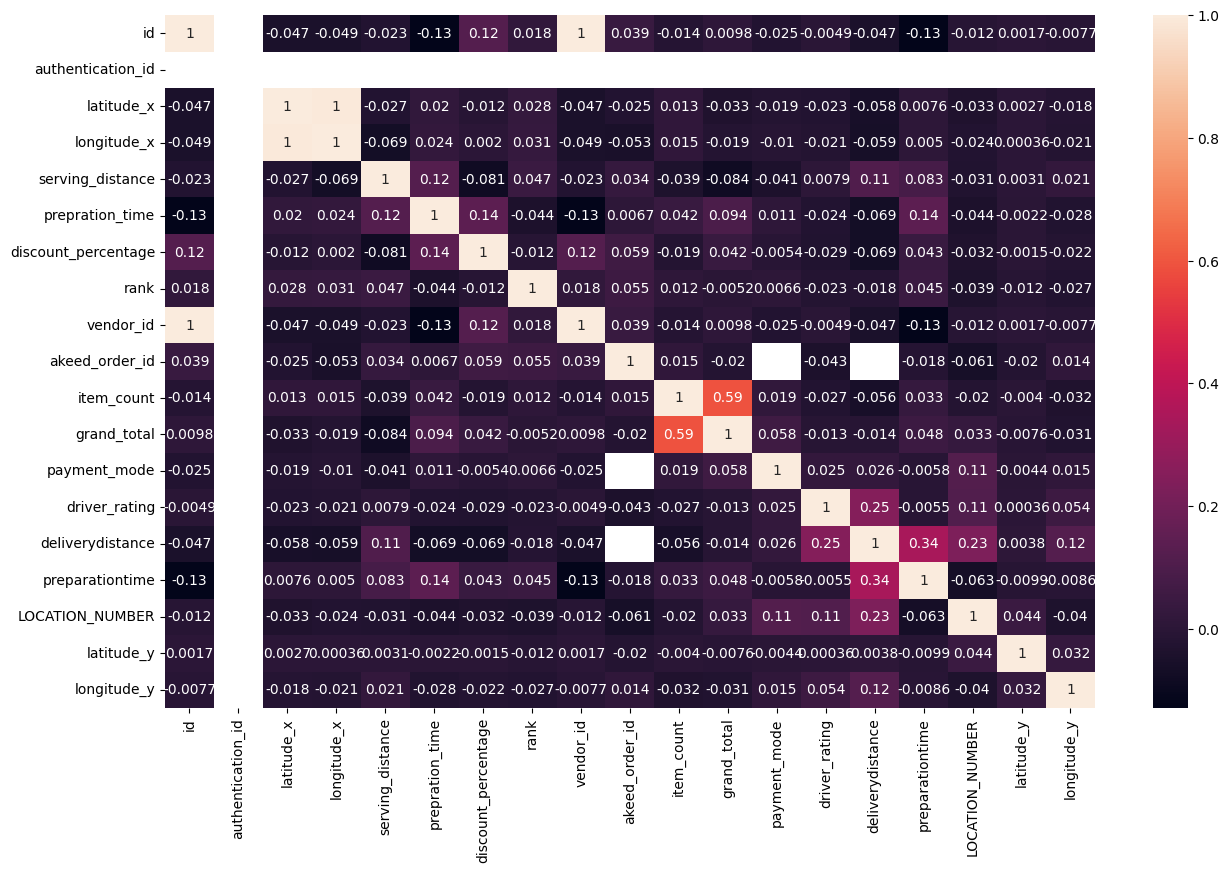

<BarContainer object of 19 artists>

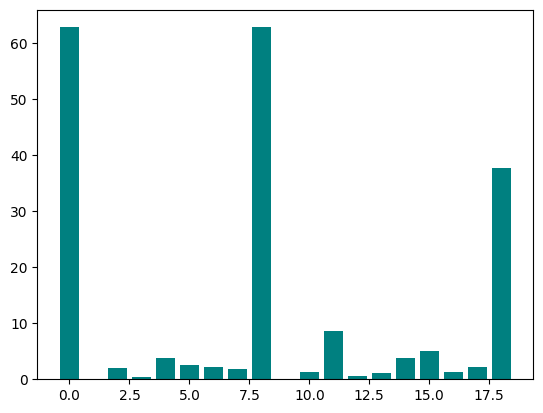

In [68]:
selected_columns = ['id', 'authentication_id', 'latitude_x', 'longitude_x',
                                  'serving_distance', 'prepration_time', 'discount_percentage', 
                                  'rank', 'vendor_id', 'akeed_order_id', 'item_count', 
                                  'grand_total', 'payment_mode', 'driver_rating', 
                                  'deliverydistance', 'preparationtime', 'LOCATION_NUMBER', 
                                  'latitude_y', 'longitude_y']
subset_df = restrurant_df[selected_columns]
cor = subset_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cor, annot=True)
plt.show()
#Mean Absolute Difference
mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis = 0)), axis =0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')

In [ ]:
#Selection on Sparse Categorical Features
#Let's have a look at the categorical data to see the number of unique values
categories = restrurant_df.columns[restrurant_df.dtypes == 'object']
percentage_unique = restrurant_df[categories].nunique() / restrurant_df.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

In [69]:
encodingRest = LabelEncoder()
ven_order_loc_cust["vendor_category_en"] = encodingRest.fit_transform(ven_order_loc_cust["vendor_category_en"])

ven_order_loc_cust["is_akeed_delivering"] = encodingRest.fit_transform(ven_order_loc_cust["is_akeed_delivering"])

ven_order_loc_cust["one_click_vendor"] = encodingRest.fit_transform(ven_order_loc_cust["one_click_vendor"])

ven_order_loc_cust["one_click_vendor"] = encodingRest.fit_transform(ven_order_loc_cust["one_click_vendor"])

ven_order_loc_cust["one_click_vendor"] = encodingRest.fit_transform(ven_order_loc_cust["one_click_vendor"])

ven_order_loc_cust["customer_id"] = encodingRest.fit_transform(ven_order_loc_cust["customer_id"])

# ven_order_loc_cust["is_favorite"] = encodingRest.fit_transform(ven_order_loc_cust["is_favorite"])

ven_order_loc_cust["is_rated"] = encodingRest.fit_transform(ven_order_loc_cust["is_rated"])

# ven_order_loc_cust["LOCATION_TYPE"] = encodingRest.fit_transform(ven_order_loc_cust["LOCATION_TYPE"])

ven_order_loc_cust["akeed_customer_id"] = encodingRest.fit_transform(ven_order_loc_cust["akeed_customer_id"])

# ven_order_loc_cust["gender"] = encodingRest.fit_transform(ven_order_loc_cust["gender"])

# ven_order_loc_cust["OpeningTime"] = encodingRest.fit_transform(ven_order_loc_cust["OpeningTime"])

ven_order_loc_cust["CID X LOC_NUM X VENDOR"] = encodingRest.fit_transform(ven_order_loc_cust["CID X LOC_NUM X VENDOR"])

In [86]:
# encodingRest = LabelEncoder()
# restrurant_df["vendor_category_en"] = encodingRest.fit_transform(restrurant_df["vendor_category_en"])

# restrurant_df["is_akeed_delivering"] = encodingRest.fit_transform(restrurant_df["is_akeed_delivering"])

# restrurant_df["one_click_vendor"] = encodingRest.fit_transform(restrurant_df["one_click_vendor"])

# restrurant_df["one_click_vendor"] = encodingRest.fit_transform(restrurant_df["one_click_vendor"])

# restrurant_df["one_click_vendor"] = encodingRest.fit_transform(restrurant_df["one_click_vendor"])

# restrurant_df["customer_id"] = encodingRest.fit_transform(restrurant_df["customer_id"])

# restrurant_df["is_favorite"] = encodingRest.fit_transform(restrurant_df["is_favorite"])

# restrurant_df["is_rated"] = encodingRest.fit_transform(restrurant_df["is_rated"])

# restrurant_df["LOCATION_TYPE"] = encodingRest.fit_transform(restrurant_df["LOCATION_TYPE"])

# restrurant_df["akeed_customer_id"] = encodingRest.fit_transform(restrurant_df["akeed_customer_id"])

# restrurant_df["gender"] = encodingRest.fit_transform(restrurant_df["gender"])

# restrurant_df["OpeningTime"] = encodingRest.fit_transform(restrurant_df["OpeningTime"])

# restrurant_df["CID X LOC_NUM X VENDOR"] = encodingRest.fit_transform(restrurant_df["CID X LOC_NUM X VENDOR"])

In [ ]:
ven_order_loc_cust.info()


In [71]:
features = ['id','latitude_x','longitude_x','serving_distance','prepration_time','discount_percentage','rank', 'vendor_id', 'item_count', 'grand_total', 'payment_mode',
            'driver_rating','deliverydistance','preparationtime', 'LOCATION_NUMBER',  ]

target = 'CID X LOC_NUM X VENDOR'
X = ven_order_loc_cust[features]
Y =ven_order_loc_cust[target]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.3035  -0.0898   0.05722 ... -0.8496  -6.6     -0.779  ]
 [-0.3035  -0.0898   0.05722 ... -0.8496  -6.6     -0.779  ]
 [-0.3035  -0.0898   0.05722 ... -0.8496  -6.6     -0.779  ]
 ...
 [-1.95     0.8857  -0.665   ...  0.5815   1.029   -0.779  ]
 [-1.95     0.8857  -0.665   ...  0.5107   1.029   -0.779  ]
 [-1.95     0.8857  -0.665   ...  0.4739   1.029   -0.779  ]]


In [ ]:

# features = ['id','authentication_id','latitude_x','longitude_x','serving_distance','prepration_time','discount_percentage','rank', 'vendor_id','akeed_order_id', 'item_count', 'grand_total', 'payment_mode',
#             'driver_rating','deliverydistance','preparationtime', 'LOCATION_NUMBER',  ]

# target = 'CID X LOC_NUM X VENDOR'
# X = restrurant_df[features]
# Y =restrurant_df[target]

# scale = StandardScaler()
# scaledX = scale.fit_transform(X)

# print(scaledX)

In [72]:
#Split the data into a training set of 25% and a test set of 75%
X_train, X_test, y_train, y_test = train_test_split(scaledX,Y, test_size=0.2)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
lr_clf = LogisticRegression()
svc_clf = SVC(probability=True)  # Set probability=True for using with AdaBoost
knn_clf = KNeighborsClassifier()
adaboost_clf = AdaBoostClassifier()

list_clf = [dt_clf]

In [74]:
lr_clf.fit(X_train, y_train)
test_y_pred = lr_clf.predict(X_test)
train_y_pred = lr_clf.predict(X_train)

: 

: 

<h1> MODEL ASSESSMENT <h1>

In [71]:
all_models = []
for clf in list_clf:
    clf.fit(X_train, y_train)
    test_y_pred = clf.predict(X_test)
    train_y_pred = clf.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_y_pred)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    train_precision = precision_score(y_train, train_y_pred, average='weighted')
    test_precision = precision_score(y_test, test_y_pred, average='weighted')

    train_recall = recall_score(y_train, train_y_pred, average='weighted')
    test_recall = recall_score(y_test, test_y_pred, average='weighted')

    train_f1_score = f1_score(y_train, train_y_pred, average='weighted')
    test_f1_score = f1_score(y_test, test_y_pred, average='weighted')

    classification_metrics = ['Accuracy-train', 'Accuracy-test', 'Precision-train', 'Precision-test',
                              'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test']

    model_metrics = [train_accuracy, test_accuracy, train_precision, test_precision,
                     train_recall, test_recall, train_f1_score, test_f1_score]

    all_models.append(model_metrics)
    
# Retrieve the metrics for each classification model
dt_clf_metrics = all_models[0]
# rf_clf_metrics = all_models[1]
# lr_clf_metrics = all_models[2]
# svc_clf_metrics = all_models[3]
# knn_clf_metrics = all_models[4]
# adaboost_clf_metrics = all_models[5]

In [ ]:
destree = pd.DataFrame([dt_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['Decision Tree'])

ranforest = pd.DataFrame([rf_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['Random forest'])

lassoc = pd.DataFrame([lr_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['Logistic Regression'])

Ridgereg = pd.DataFrame([svc_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['SVM (SVC)'])

linearR = pd.DataFrame([knn_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['KNN'])

Adaboost = pd.DataFrame([adaboost_clf_metrics], index=['R2-train', 'R2-test', 'Precision-train', 'Precision-test', 'Recall-train', 'Recall-test', 'F1-score-train', 'F1-score-test'], columns=['AdaBoost'])


In [ ]:
dfs = [destree, ranforest, lassoc, Ridgereg, linearR, Adaboost]

# Merge the DataFrames
merged_df = pd.concat(dfs, axis=1)

# Display the merged DataFrame
print(merged_df)
